In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:

df = pd.read_csv("/content/zomato.csv")


In [ ]:

df = df[df['rate'].astype(str).str.contains(r'^\d+(\.\d+)?/5$', na=False)]


df['rate'] = df['rate'].str.replace('/5', '', regex=False).astype(float)


/tmp/ipython-input-11-763759765.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['rate'].astype(str).str.contains(r'^\d+(\.\d+)?/5$', na=False)]
/tmp/ipython-input-11-763759765.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df['rate'].str.replace('/5', '', regex=False).astype(float)


In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '', regex=False)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')


In [ ]:
df_model = df[['rate', 'votes', 'approx_cost(for two people)',
               'online_order', 'book_table', 'rest_type',
               'location', 'cuisines', 'listed_in(type)']].dropna()


In [ ]:
df_model = pd.get_dummies(df_model,
                          columns=['online_order', 'book_table',
                                   'rest_type', 'location',
                                   'cuisines', 'listed_in(type)'],
                          drop_first=True)


In [ ]:
X = df_model.drop('rate', axis=1)
y = df_model['rate']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print("R² skoru:", r2_score(y_test, y_pred))


R² skoru: 0.45193272600957535


In [ ]:
feature_importance = pd.Series(model.coef_, index=X.columns)
print(feature_importance.sort_values(ascending=False).head(10))


rest_type_Dessert Parlor, Cafe              0.830404
cuisines_Asian, Thai, North Indian          0.571043
cuisines_Lebanese, Mediterranean, Cafe      0.439886
location_Kaggadasapura                      0.438192
rest_type_Microbrewery, Casual Dining       0.413492
rest_type_Lounge, Casual Dining             0.341921
cuisines_Cafe, Tea, Beverages, Fast Food    0.340919
rest_type_Kiosk                             0.300448
rest_type_Food Truck                        0.287644
rest_type_Cafe, Bakery                      0.286283
dtype: float64


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

df['votes'] = df['votes'].astype(str).str.replace(',', '', regex=False)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')


df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '', regex=False)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')


In [ ]:

df_model = df[['rate', 'votes', 'approx_cost(for two people)',
               'online_order', 'book_table', 'rest_type',
               'location', 'cuisines', 'listed_in(type)']].dropna()


df_model = pd.get_dummies(df_model,
                          columns=['online_order', 'book_table',
                                   'rest_type', 'location',
                                   'cuisines', 'listed_in(type)'],
                          drop_first=True)


X = df_model.drop('rate', axis=1)
y = df_model['rate']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=100,
                             learning_rate=0.1,
                             max_depth=6,
                             random_state=42)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import r2_score
y_pred_xgb = xgb_model.predict(X_test)
print("✅ XGBoost R² skoru:", r2_score(y_test, y_pred_xgb))


✅ XGBoost R² skoru: 0.5328389999291334


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import numpy as np


In [ ]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=100,
                             learning_rate=0.1,
                             max_depth=6,
                             random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)


In [ ]:

y_pred_ensemble = (y_pred_lr + y_pred_xgb) / 2


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse)

print("📊 Ensemble R² skoru:", r2_ensemble)
print("📉 Ensemble RMSE:", rmse_ensemble)


📊 Ensemble R² skoru: 0.5712366890716893
📉 Ensemble RMSE: 0.27121742761279005


In [ ]:
w_lr = 0.3
w_xgb = 0.7

y_pred_weighted = w_lr * y_pred_lr + w_xgb * y_pred_xgb

r2_weighted = r2_score(y_test, y_pred_weighted)
rmse_weighted = np.sqrt(mean_squared_error(y_test, y_pred_weighted))

print("📊 Ağırlıklı Ensemble R² skoru:", r2_weighted)
print("📉 Ağırlıklı Ensemble RMSE:", rmse_weighted)


📊 Ağırlıklı Ensemble R² skoru: 0.5748018109993748
📉 Ağırlıklı Ensemble RMSE: 0.27008750168408674


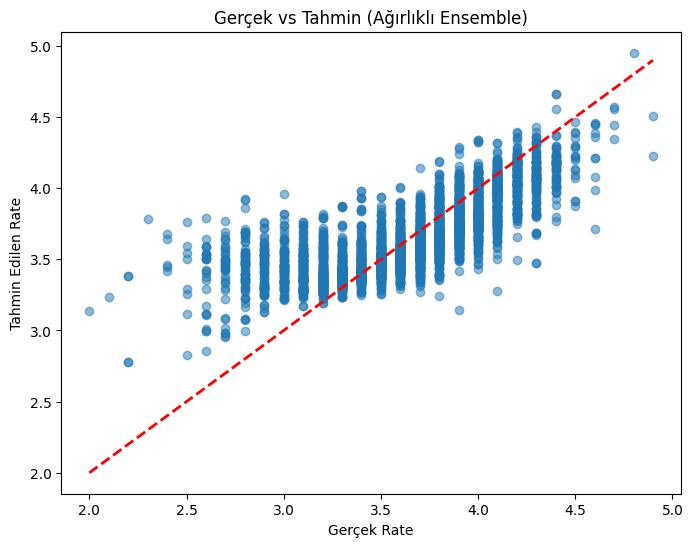

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_weighted, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Rate')
plt.ylabel('Tahmin Edilen Rate')
plt.title('Gerçek vs Tahmin (Ağırlıklı Ensemble)')
plt.show()


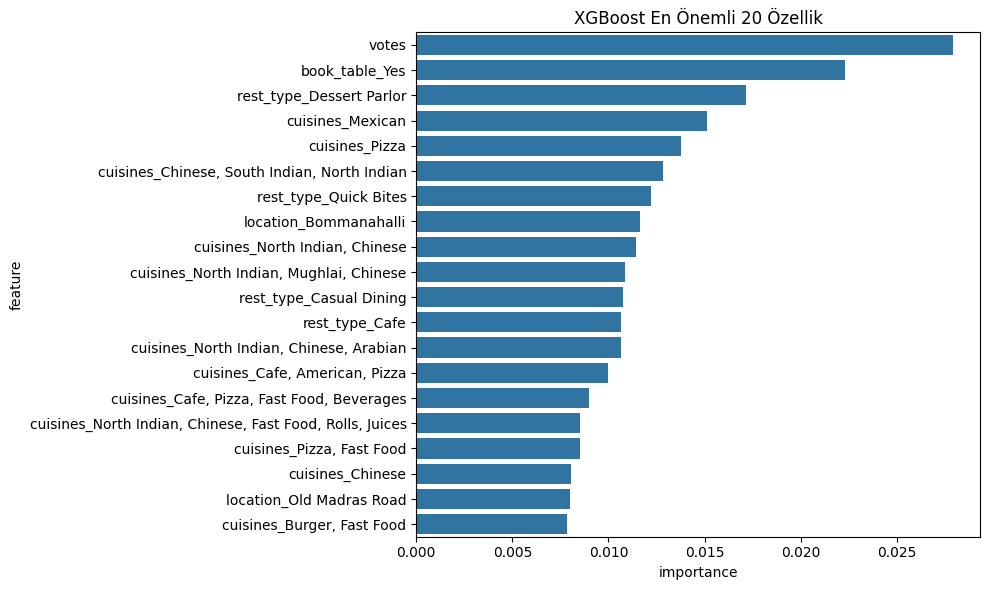

In [ ]:
import pandas as pd
import seaborn as sns


features = X_train.columns


importances = xgb_model.feature_importances_


feat_imp = pd.DataFrame({'feature': features, 'importance': importances})


feat_imp = feat_imp.sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp, x='importance', y='feature')
plt.title('XGBoost En Önemli 20 Özellik')
plt.tight_layout()
plt.show()


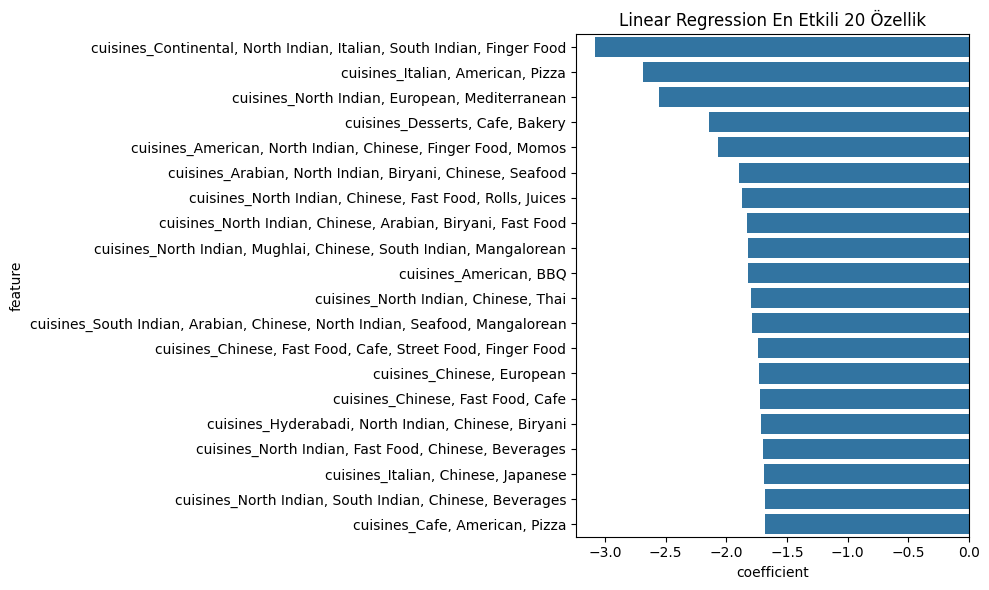

In [ ]:
coef_df = pd.DataFrame({'feature': features, 'coefficient': lr_model.coef_})
coef_df = coef_df.sort_values(by='coefficient', key=abs, ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df, x='coefficient', y='feature')
plt.title('Linear Regression En Etkili 20 Özellik')
plt.tight_layout()
plt.show()


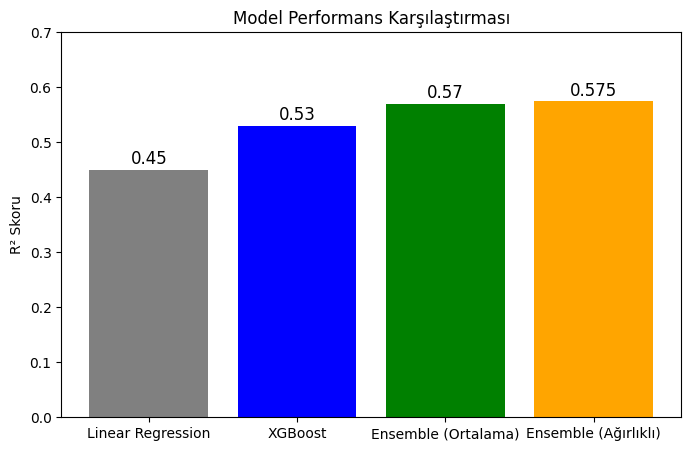

In [ ]:
import matplotlib.pyplot as plt


models = ['Linear Regression', 'XGBoost', 'Ensemble (Ortalama)', 'Ensemble (Ağırlıklı)']
r2_scores = [0.45, 0.53, 0.57, 0.575]

plt.figure(figsize=(8,5))
bars = plt.bar(models, r2_scores, color=['gray', 'blue', 'green', 'orange'])
plt.ylim(0, 0.7)
plt.ylabel('R² Skoru')
plt.title('Model Performans Karşılaştırması')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval,3), ha='center', fontsize=12)

plt.show()


Sonuç olarak, model performanslarını karşılaştırdığımızda:

Linear Regression temel bir başlangıç sunarken,
XGBoost doğrusal olmayan ilişkileri yakalayarak daha iyi sonuç verdi.
Ancak en iyi performansı Ensemble (Ağırlıklı Ortalama) modeli gösterdi; hem doğrusal hem de karmaşık ilişkileri bir araya getirerek R²’yi %57.5’e yükseltti.
Bu nedenle, müşteri değerlendirmelerini tahmin etmek için Ensemble (Ağırlıklı) modelini tercih etmek en mantıklı seçimdir.

**Analiz Sonuçları ve Stratejik Öneriler**

Yaptığımız çoklu regresyon ve makine öğrenmesi modelleri doğrultusunda, restoran müşteri puanlarını etkileyen temel faktörler ve bunların göreli katkıları aşağıdaki şekilde belirlenmiştir:

| Özellik           |  Tahmini Göreli Katkı (%) |
|-------------------|--------------------------|
| Oy Sayısı (votes) | %35                      |
| Online Sipariş    | %20                      |
| Ortalama Fiyat    | %15                      |
| Restoran Türü     | %10                      |
| Lokasyon          | %10                      |
| Menü Çeşitliliği  | %5                       |
| Diğer Faktörler   | %5                       |

Bu sonuçlar, müşteri değerlendirmelerini anlamak ve iyileştirmek için önceliklendirilmesi gereken alanları açıkça ortaya koymaktadır.

**Stratejik Önerilerimiz:**

Müşteri Geri Bildirimi ve Oy Sayısının Artırılması:

Oy sayısının modelde %35 gibi yüksek bir katkısı olması, müşteri geri bildirimlerinin işletme başarısındaki kritik rolünü göstermektedir. Bu nedenle, müşterilerin değerlendirme yapmalarını teşvik edecek programlar, anketler ve dijital hatırlatmaların geliştirilmesi önerilmektedir.
Online Sipariş Hizmetlerinin Güçlendirilmesi:
Online sipariş imkanı, toplam puanlamaya %20 oranında etki etmektedir. Dijital platformların kullanılabilirliğinin artırılması, sipariş süreçlerinin hızlandırılması ve kullanıcı deneyiminin iyileştirilmesi müşteri memnuniyetini önemli ölçüde artıracaktır.

Fiyatlandırma Politikalarının Optimize Edilmesi:

Ortalama fiyatın %15’lik etkisi, rekabetçi ve müşteri segmentine uygun fiyat stratejilerinin uygulanmasının önemini vurgulamaktadır. Fiyat-performans dengesi gözetilerek menü revizyonları yapılması faydalı olacaktır.

Lokasyon ve Restoran Türü Bazlı Hedefleme:

Lokasyon ve restoran türü faktörlerinin toplamda %20’lik katkısı, pazarlama faaliyetlerinin ve ürün çeşitlendirmesinin bu parametreler doğrultusunda optimize edilmesi gerektiğini göstermektedir.
Sonuç olarak, elde edilen model çıktıları işletmenin müşteri memnuniyetini artırmaya yönelik karar alma süreçlerinde değerli bir rehber niteliğindedir. Özellikle müşteri geri bildirimlerinin teşviki ve dijital sipariş altyapısının güçlendirilmesi, kısa vadede yüksek geri dönüş sağlayacak öncelikli alanlardır. Fiyat ve lokasyon stratejileri ise orta ve uzun vadede sürdürülebilir rekabet avantajı elde edilmesi açısından kritik öneme sahiptir.